# Fermi-Dirac Integrals

The {py:obj}`FermiIntegral <pynucastro.eos.fermi_integrals.FermiIntegral>` class can
compute general Fermi-Dirac integrals of the form:

$$F_k(\eta, \beta) = \int_0^\infty
           \frac{x^k [1 + (x\beta/2)]^{1/2}}{e^{x-\eta} + 1} dx$$

where $k$ is the index, $\eta = \mu / (k_B T)$ is the degeneracy parameter (with $\mu$ the chemical potential) and
$\beta = k_B T / (m_e c^2)$ a measure of how relativistic the gas is.  

Typically, in stellar conditions, we can encounter $10^{-6} \le \beta \le 10^4$ and $-100 \le \eta \le 10^4$.

pynucastro computes this integral using the method of {cite:t}`Gong:2001`, which breaks the integration into 4 parts, using Legendre quadrature for the first 3 and Laguerre quadrature for the last.  Additionally, it constructs the integral in the first part in terms of $x^2$ to avoid a singularity at the origin.

## Computing the integral

We need to specify $k$, $\eta$, and $\beta$ upon creation of a `FermiIntegral`, and then we can evaluate it (and optionally its derivatives):

In [1]:
import pynucastro as pyna

In [2]:
k = 0.5
eta = 100
beta = 10
F = pyna.FermiIntegral(k, eta, beta)
F.evaluate()
print(F)

F        = 11206.29935182625
dF/dη    = 223.83029281927145
dF/dβ    = 558.0936626647642
d²F/dη²  = 2.2360690944034847
d²F/dηdβ = 11.169176295716623
d²F/dβ²  = -27.794870920170332



First and second derivatives can be disabled via the parameters to {py:func}`evaluate <pynucastro.eos.fermi_integrals.FermiIntegral.evaluate>`.

## Trends

We can explore how $F_k$ varies with $\eta$ and $\beta$.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

First, for fixed $\eta$, let's see the variation with $\beta$

In [4]:
k = 0.5
Fs = {}
betas = np.logspace(-6, 4, 50)
for eta in [-10, -1, 0,
            1, 10, 100, 1000]:
    res = []
    for beta in betas:
        F = pyna.FermiIntegral(k, eta, beta)
        F.evaluate(do_first_derivs=False, do_second_derivs=False)
        res.append(F.F)

    Fs[eta] = res

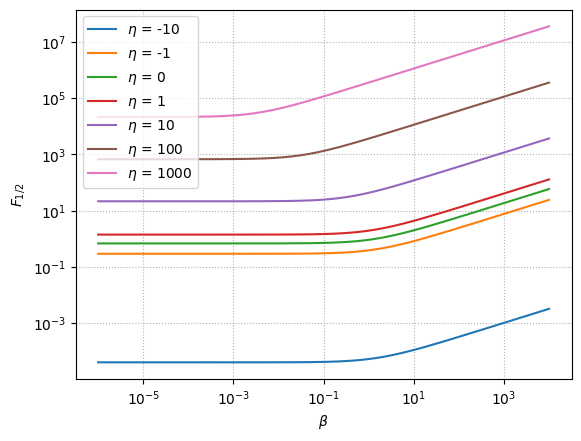

In [5]:
fig, ax = plt.subplots()
for key in Fs:
    ax.loglog(betas, Fs[key], label=rf"$\eta$ = {key}")
ax.legend()
ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$F_{1/2}$")
ax.grid(ls=":")

Now for fixed $\beta$, let's see the variation with $\eta$.

In [6]:
etam = np.logspace(-2, 1.5, 21)
etap = np.logspace(-2, 3, 41)
etas = np.concatenate((-etam[::-1], etap))

In [7]:
k = 0.5
Fs = {}
for beta in np.logspace(-6, 4, 6):
    res = []
    for eta in etas:
        F = pyna.FermiIntegral(k, eta, beta)
        F.evaluate(do_first_derivs=False, do_second_derivs=False)
        res.append(F.F)

    Fs[beta] = res

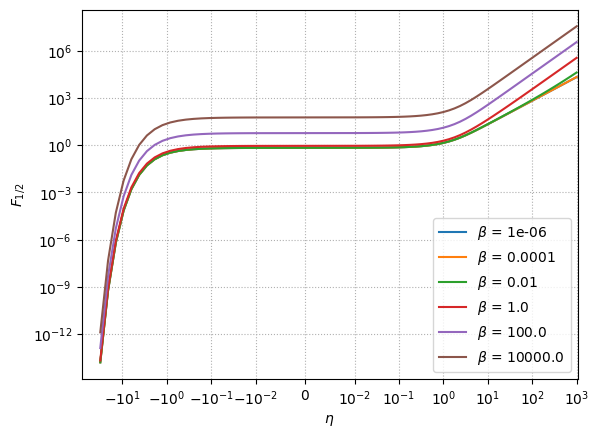

In [8]:
fig, ax = plt.subplots()
for key in Fs:
    ax.plot(etas, Fs[key], label=rf"$\beta$ = {key}")
ax.legend()
ax.set_yscale("log")
ax.set_xscale("symlog", linthresh=1.e-2)
ax.set_xlabel(r"$\eta$")
ax.set_ylabel(r"$F_{1/2}$")
ax.grid(ls=":")